In [22]:
import osmnx as ox
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
#setup coordinate for norwich, and 1500m area.
point = (52.63, 1.29)
dist = 500
tags = {"building":True}

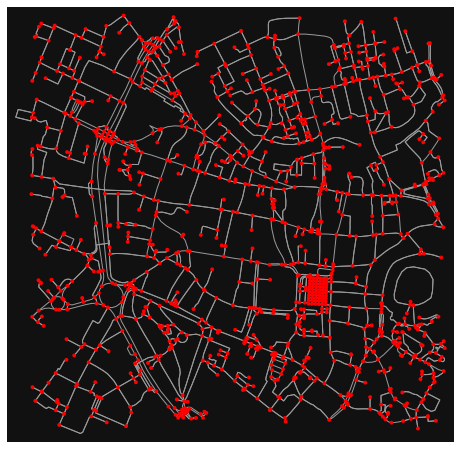

In [24]:

#get a graph of the roads in the centre of norwich.
graph_norwich = ox.graph_from_point(point, dist=dist)

#we can get the edges and nodes from a graph. 
nor_nodes, nor_edges = ox.graph_to_gdfs(graph_norwich)

#plot the graph (edge and nodes)
fig, ax = ox.plot_graph(graph_norwich, node_color='r')

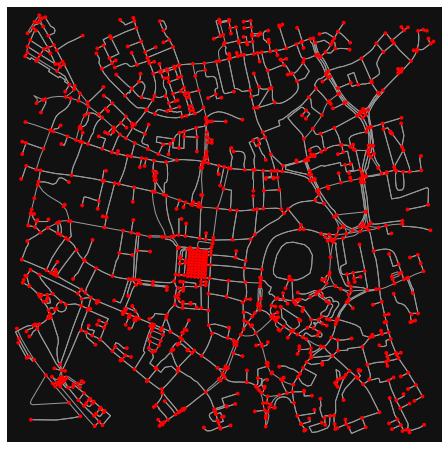

In [25]:

# network from address, including only nodes within 1km along the network from the address
jarrolds_graph = ox.graph_from_address(address='1 London St, Norwich, UK', dist=dist)

# you can project the network to UTM (zone calculated automatically)
JG_projected = ox.project_graph(jarrolds_graph)

#plot the graph (edge and nodes)
fig, ax = ox.plot_graph(JG_projected, node_color='r')


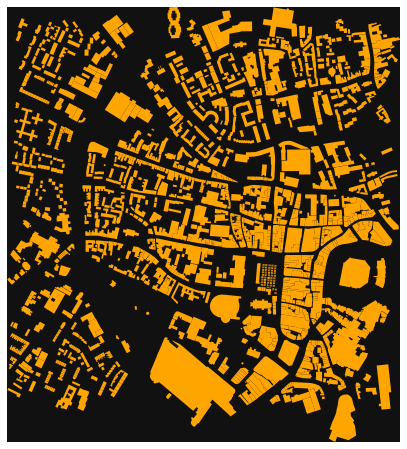

In [26]:
#get the building foot prints for the city centre.
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)

fig1, ax1 = ox.plot_footprints(gdf_proj)

D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


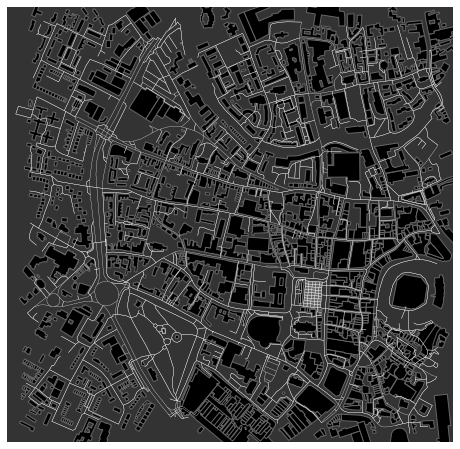

In [30]:

# plot the network, but do not show it or close it yet
fig, ax = ox.plot_graph(ox.project_graph(graph_norwich), show=False, close=False, bgcolor='#333333',
                        edge_color='w', edge_linewidth=0.3, node_size=0)

from shapely.geometry import Polygon, MultiPolygon
from descartes import PolygonPatch
 
#we add the polygons to the 
for geometry in gdf_proj['geometry'].tolist():
    #only process the polygons, and multipolgons
    if isinstance(geometry, Polygon):
        patch = PolygonPatch(geometry, fc='k', ec='#666666', lw=1, alpha=1, zorder=-1)
        ax.add_patch(patch)
    if isinstance(geometry, MultiPolygon):
        for polygon in geometry:
            patch = PolygonPatch(geometry, fc='k', ec='#666666', lw=1, alpha=1, zorder=-1)
            ax.add_patch(patch)
plt.show()